# Introduction 

Weilun Tang 

Written by 09/19/2021

This program is used for general a data with noises and use polynomial to fit the data. The data on this program is generated by arduino through a RC filter on a breadboard and it is displayed on a oscillascope. The array arr has 3 columns. The first column is frequency and it is converted to time. The second column is the output without a RC filter, and the third column is the output with a RC filter. In this program, only the first and second column are used.

# Imports

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Functions

In [132]:
def numberToFilename(num): #Find the file with desired frequency
    return str(num)+'hz.txt'

def filenameToNumpy(filename):  #Open the file and store data in a numpy array
    df = pd.read_csv(filename, sep="\t\t", skiprows=[0,1,2,3,4,5,6,7,8,9])
    arr = df.to_numpy()
    arr = arr[1:,:]
    return arr

def convertToTime(arr, filename):  #Convert frequency to time 
    if filenameToNumber(filename) in [10, 50, 100]: 
        timestep = 0.00002 # example
        arr[:,0] *= timestep
    
    elif filenameToNumber(filename) in [200, 347, 500, 1000]:
        timestep = 0.000002
        arr[:,0] *= timestep
    return arr

def breakUpUnfilt(arr): #Slice the array to a 2 columns array 
    return arr[:,:2]


# Main Loop

1 degree of polynomial: 
fitted coefficients: [513.3419743   59.44805823]
 residual: [8.93627553e+09]

2 degree of polynomial: 
fitted coefficients: [300.6604712  453.19785364  61.45386457]
 residual: [8.9362675e+09]

3 degree of polynomial: 
fitted coefficients: [ 2.84581531e+05 -8.50908737e+04  7.28691144e+03 -5.25495400e+01]
 residual: [8.91776922e+09]

4 degree of polynomial: 
fitted coefficients: [-4.83247228e+05  4.77919082e+05 -1.09956016e+05  8.39263662e+03
 -6.36239241e+01]
 residual: [8.91763378e+09]

5 degree of polynomial: 
fitted coefficients: [ 1.42767690e+08 -7.18813689e+07  1.31744090e+07 -1.06259744e+06
  3.56327334e+04 -2.45642005e+02]
 residual: [8.88778765e+09]

6 degree of polynomial: 
fitted coefficients: [-7.42629295e+08  5.88434382e+08 -1.73195589e+08  2.39852036e+07
 -1.60344795e+06  4.64616388e+04 -2.97373094e+02]
 residual: [8.88575505e+09]

7 degree of polynomial: 
fitted coefficients: [ 6.22949309e+10 -4.43578022e+10  1.26695018e+10 -1.85167535e+09
  1.4611

<ipython-input-132-e21bb6a42683>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filename, sep="\t\t", skiprows=[0,1,2,3,4,5,6,7,8,9])


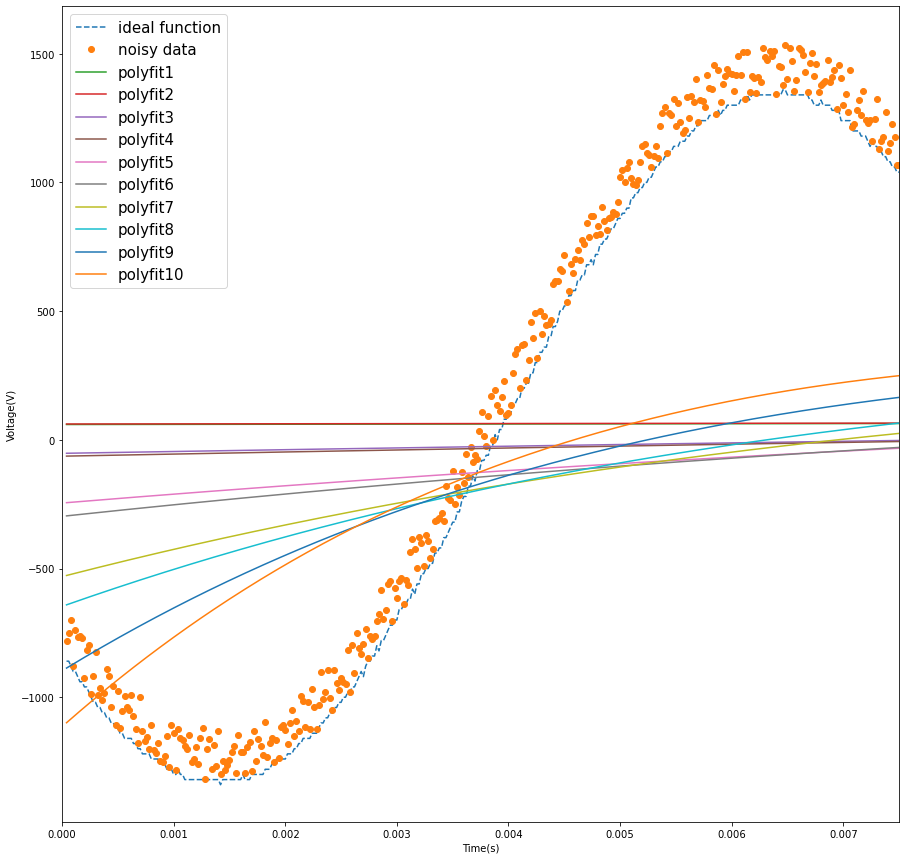

In [140]:
#Open the file and store the data into an array and convert frequency to time.
#Finally, slice the array to a 2 columns array
arr = breakUpUnfilt(convertToTime(filenameToNumpy
    (numberToFilename(100)), numberToFilename(100)))

y = arr[:,1] + np.random.rand(len(arr)) * 200         #multiply 200 to scale the noise 

plt.figure(figsize = (15,15))  
plt.plot(arr[:,0],arr[:,1], '--',label = 'ideal function')#x is the first column of arr                                   
plt.plot(arr[:,0],y, 'o', label = 'noisy data')
plt.xlim(0,0.0075)
 
for i in range(1,11):
    fit = np.polyfit(arr[:,0],y,i, full = True)
    y1 = np.polyval(fit[0],arr[:,0])
    plt.plot(arr[:,0], y1, label = 'polyfit' + str(i))
    print(i ,'degree of polynomial: ')
    print('fitted coefficients: ' + str(fit[0]) + '\n residual: '+ str(fit[1]))
    print('')

plt.xlabel('Time(s)')
plt.ylabel('Voltage(V)')
plt.legend(fontsize = 15)


This graph is showing x between 0s to 0.0075s. The idea function is a sine function, and the small fluctuation on the idea function graph caused by the noises in the wires and the breadboard. The orange dots are the random noisy data. Even in this small portion of the graph, one can conclude that all of the polynomials do not fit with the data. The residual errors are large from all degrees of polynomials.